Taller 5 - métodos computacionales 2

Catalina Fuentes y Silvana Archila

2. Metrópolis-Hastings para muestrear distribuciones 

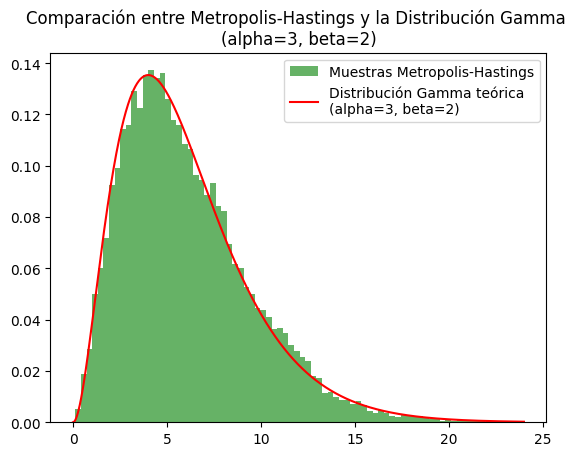

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

alpha = 3
beta = 2

#función de la distribución Gamma 
def gamma_distr(x, alpha, beta):
    if x > 0:
        return x**(alpha - 1) * np.exp(-x / beta)
    else:
        return 0

#algoritmo de Metrópolis-Hastings
def metropolis_hastings_gamma(alpha, beta, N):
    x = np.random.rand()   
    samples = [x]
    
    for i in range(N):
        # Propuesta de un nuevo valor usando una distribución normal en torno al actual
        x_new = samples[-1] + np.random.normal(0, 0.7) #EL DE LA DERECHA ES EL ANCHO
        
        # Calculamos la tasa de aceptación
        tasa = gamma_distr(x_new, alpha, beta) / gamma_distr(x, alpha, beta)
        
        # Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x = x_new
        
        samples.append(x)
    
    return np.array(samples)

N = 30000
samples = metropolis_hastings_gamma(alpha, beta, N)

#Histograma
plt.hist(samples, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Función Gamma
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Comparación entre Metropolis-Hastings y la Distribución Gamma \n(alpha={alpha}, beta={beta})")
plt.show()


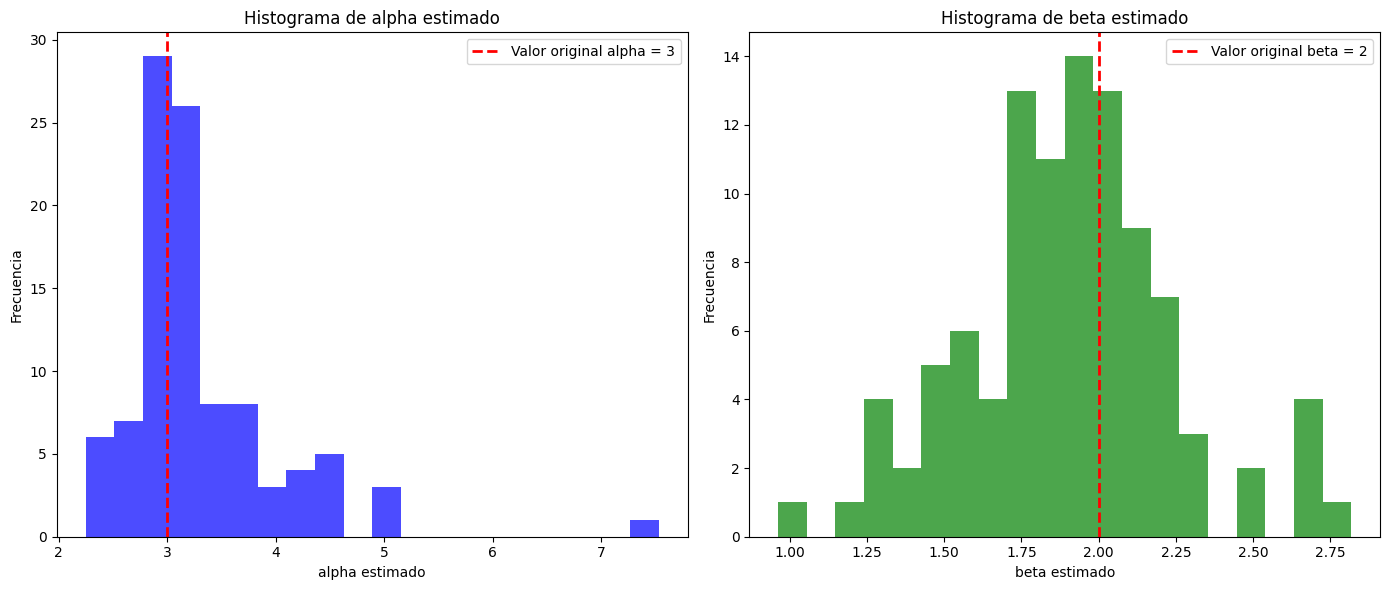

In [100]:
repeticiones = 100
N = 10000

alpha_estimados = []
beta_estimados = []

for i in range(repeticiones):
    samples = metropolis_hastings_gamma(alpha, beta, N)
    alpha_hat, loc, beta_hat = stats.gamma.fit(samples, scale=1)  
    alpha_estimados.append(alpha_hat)
    beta_estimados.append(beta_hat)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de alfa estimado
ax1.hist(alpha_estimados, bins=20, color='blue', alpha=0.7)
ax1.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original alfa = {alpha}')
ax1.set_title('Histograma de alfa estimado')
ax1.set_xlabel('alpha estimado')
ax1.set_ylabel('Frecuencia')
ax1.legend()

#Histograma de beta estimado
ax2.hist(beta_estimados, bins=20, color='green', alpha=0.7)
ax2.axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original beta = {beta}')
ax2.set_title('Histograma de beta estimado')
ax2.set_xlabel('beta estimado')
ax2.set_ylabel('Frecuencia')
ax2.legend()

plt.tight_layout()
plt.show()

Los datos se recuperan de forma medianamente adecuada, la precisión ???? std

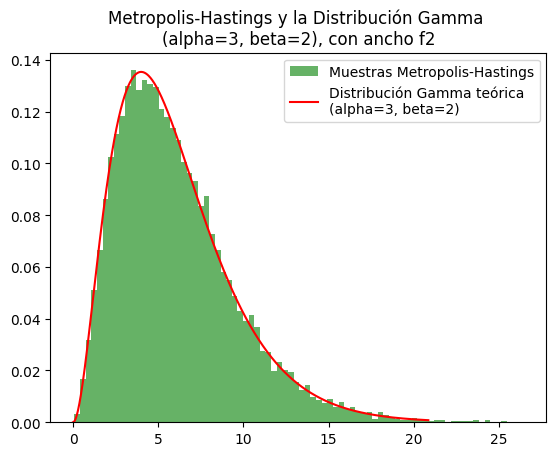

In [105]:
#Cambio el ancho de la distribución de perturbación

ancho = 2
def metropolis_hastings_gamma(alpha, beta, N):
    x = np.random.rand()   
    samples = [x]
    
    for i in range(N):
        # Propuesta de un nuevo valor usando una distribución normal en torno al actual
        x_new = samples[-1] + np.random.normal(0, ancho) 
        
        # Calculamos la tasa de aceptación
        tasa = gamma_distr(x_new, alpha, beta) / gamma_distr(x, alpha, beta)
        
        # Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x = x_new
        
        samples.append(x)
    
    return np.array(samples)

N = 30000
samples2 = metropolis_hastings_gamma(alpha, beta, N)

#Histograma
plt.hist(samples2, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Función Gamma
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Metropolis-Hastings y la Distribución Gamma \n(alpha={alpha}, beta={beta}), con ancho f{ancho}")
plt.show()


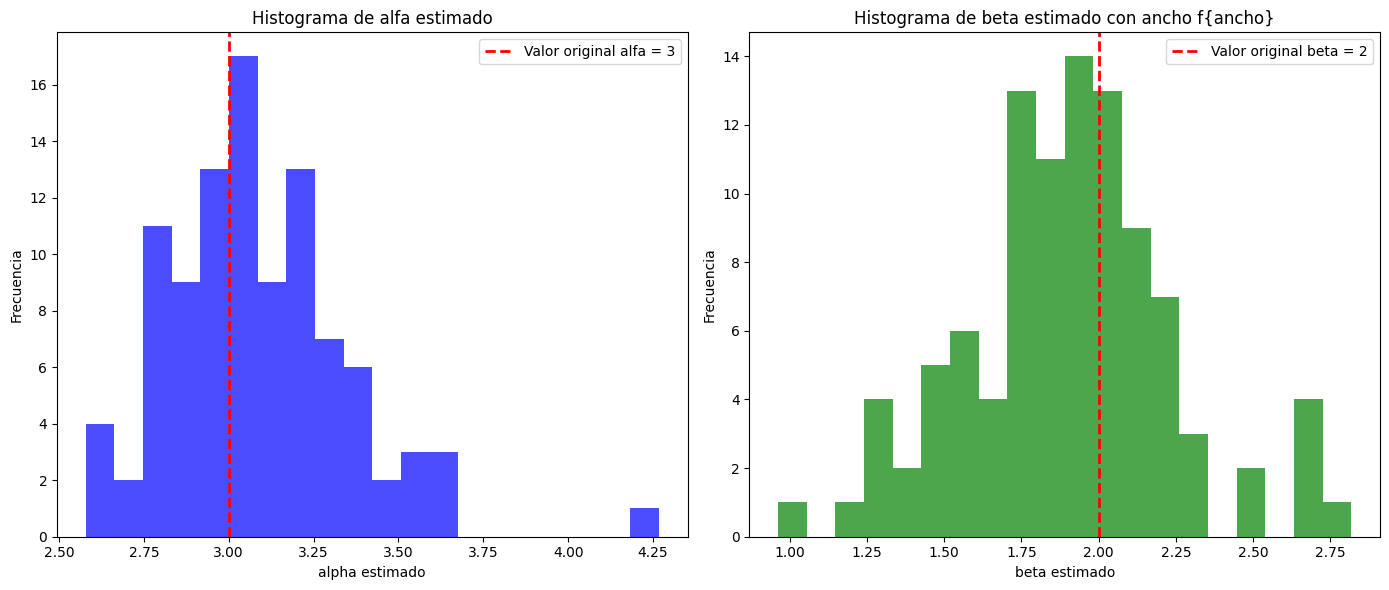

In [106]:
repeticiones = 100
N = 10000

alpha_estimados2 = []
beta_estimados2 = []

for i in range(repeticiones):
    samples = metropolis_hastings_gamma(alpha, beta, N)
    alpha_hat, loc, beta_hat = stats.gamma.fit(samples, scale=1)  
    alpha_estimados2.append(alpha_hat)
    beta_estimados2.append(beta_hat)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de alfa estimado
ax1.hist(alpha_estimados2, bins=20, color='blue', alpha=0.7)
ax1.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original alfa = {alpha}')
ax1.set_title('Histograma de alfa estimado')
ax1.set_xlabel('alpha estimado')
ax1.set_ylabel('Frecuencia')
ax1.legend()

#Histograma de beta estimado
ax2.hist(beta_estimados, bins=20, color='green', alpha=0.7)
ax2.axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original beta = {beta}')
ax2.set_title('Histograma de beta estimado con ancho f{ancho}')
ax2.set_xlabel('beta estimado')
ax2.set_ylabel('Frecuencia')
ax2.legend()

plt.tight_layout()
plt.show()

mirar que tanro se jode al subir o bajar el ancho, hay un sweetspot